In [ ]:
pip install datasets

In [ ]:
pip install fasttext

In [17]:
from datasets import load_dataset
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import fasttext
import fasttext.util
import numpy as np

In [ ]:
dataset = load_dataset("surrey-nlp/PLOD-CW")
train_data = dataset["train"]
test_data = dataset["test"]

In [ ]:
# Load a pre-trained FastText model
fasttext.util.download_model('en', if_exists='ignore')
ft_model = fasttext.load_model('cc.en.300.bin')

In [ ]:
# Helper function to convert sentences to FastText embeddings
def text_to_embedding(sentence):
    return ft_model.get_sentence_vector(' '.join(sentence))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

In [ ]:
def prepare_data(data):
    X = []
    y = []
    for example in data:
        sentence = example['tokens']
        ner_tags = example['ner_tags']
        # Classify if sentence contains 'LF' tag
        label = int(any(tag == 'B-LF' or tag == 'I-LF' for tag in ner_tags))
        X.append(text_to_embedding(sentence))
        y.append(label)
    return np.array(X), np.array(y)


In [14]:
X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)



In [15]:
# Train an SVM classifier
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear'))
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
predictions = svm_classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.62      0.54        40
           1       0.85      0.75      0.80       113

    accuracy                           0.72       153
   macro avg       0.66      0.69      0.67       153
weighted avg       0.75      0.72      0.73       153



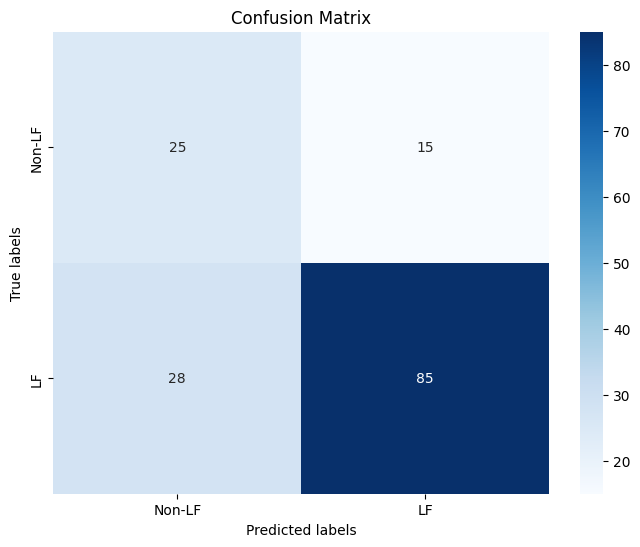

In [18]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-LF', 'LF'], yticklabels=['Non-LF', 'LF'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()